**Import thư viện**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib

# **Đọc dữ liệu**





In [ ]:
data_df = pd.read_excel('processed_data.xlsx')

data_df = data_df.dropna(how='all', subset=[col for col in data_df.columns if col != 'id'])
data_df = data_df.dropna(subset=['Price'])
data_df = data_df.drop(columns=['Id', 'Title', 'Province', 'Address', 'Owner', 'Description'])

# Chuyển các trường số sang kiểu float
data_df['Frontage'] = pd.to_numeric(data_df['Frontage'], errors='coerce').astype('float')
data_df['Area'] = pd.to_numeric(data_df['Area'], errors='coerce').astype('float')
data_df['Price'] = pd.to_numeric(data_df['Price'], errors='coerce').astype('float')
data_df['Price'] = data_df['Price']/1000000
data_df['NumberOfFloor'] = pd.to_numeric(data_df['NumberOfFloor'], errors='coerce').astype('float')
data_df['NumberOfBedroom'] = pd.to_numeric(data_df['NumberOfBedroom'], errors='coerce').astype('float')
data_df['NumberOfBathroom'] = pd.to_numeric(data_df['NumberOfBathroom'], errors='coerce').astype('float')

data_df.head()

District         Ward       Street  Frontage MainOrientation  \
0       Đống Đa  Trung Phụng   Khâm Thiên       3.8             NaN   
1       Đống Đa   Trung Liệt      Thái Hà       5.0             NaN   
2  Hai Bà Trưng     Bạch Mai     Bạch Mai       3.8             NaN   
3       Đống Đa    Ô Chợ Dừa    Hoàng Cầu       6.8             NaN   
4      Cầu Giấy      Yên Hòa  Mạc Thái Tổ       3.9      Đông - Nam   

  BalconyOrientation  NumberOfFloor  NumberOfBedroom  NumberOfBathroom  \
0                NaN            2.0              1.0               1.0   
1                NaN            5.0              NaN               NaN   
2                NaN            5.0              6.0               4.0   
3                NaN            7.0              5.0               6.0   
4         Đông - Nam            6.0              NaN               NaN   

  LegalDocumentType Furnishing  Area  Price  
0    Sổ đỏ/ Sổ hồng        NaN  51.0    8.0  
1    Sổ đỏ/ Sổ hồng        NaN  51.0   15.8  
2    Sổ đỏ/ Sổ hồng     Đầy đủ  48.0    8.6  
3    Sổ đỏ/ Sổ hồng     Cơ bản  53.0   11.3  
4    Sổ đỏ/ Sổ hồng        NaN  42.2   23.3

In [ ]:
data_df.shape

(16230, 13)

# **Khám phá dữ liệu**

In [ ]:
district_counts = data_df['District'].value_counts()

print(district_counts)

District
Cầu Giấy        2357
Long Biên       2202
Đống Đa         2193
Hà Đông         1812
Thanh Xuân      1684
Ba Đình         1575
Hai Bà Trưng    1547
Hoàng Mai       1546
Nam Từ Liêm     1305
Thanh Trì          4
Bắc Từ Liêm        2
Thường Tín         2
Gia Lâm            1
Name: count, dtype: int64


In [ ]:
# Loại bỏ các dòng có District không trong phạm vi nghiên cứu
data_df = data_df[~data_df['District'].isin([
    'Ba Đình','Tây Hồ','Gia Lâm', 'Bắc Từ Liêm', 'Đông Anh', 'Thanh Trì', 'Thường Tín', 'Mê Linh', 'Hoài Đức'
])]

In [ ]:
categorical_cols_list = ['District', 'Ward', 'Street', 'MainOrientation', 'BalconyOrientation', 'LegalDocumentType', 'Furnishing']
numerical_cols_list = ['Frontage', 'NumberOfFloor', 'NumberOfBedroom', 'NumberOfBathroom', 'Area', 'Price']

categorical_cols = data_df[categorical_cols_list].describe(include='all')
numerical_cols = data_df[numerical_cols_list].describe()

print(categorical_cols, "\n\n", numerical_cols)

        District       Ward     Street MainOrientation BalconyOrientation  \
count      14646      14646      13631            2040               1373   
unique         8        110        648               8                  8   
top     Cầu Giấy  Dịch Vọng  Minh Khai      Đông - Nam         Đông - Nam   
freq        2357        507        272             508                338   

       LegalDocumentType Furnishing  
count              13622       9081  
unique               347        476  
top       Sổ đỏ/ Sổ hồng     Đầy đủ  
freq               11456       5208   

           Frontage  NumberOfFloor  NumberOfBedroom  NumberOfBathroom  \
count  9891.000000   13431.000000     11123.000000       9573.000000   
mean      6.456682       5.106247         5.665468          5.609109   
std      13.135162       1.675574         6.236989          5.617466   
min       1.000000       1.000000         1.000000          1.000000   
25%       4.000000       4.000000         3.000000          3

In [ ]:
document_counts = data_df['LegalDocumentType'].value_counts()

print(document_counts)

LegalDocumentType
Sổ đỏ/ Sổ hồng                                            11456
Sổ đỏ/ Sổ hồng.                                            1116
Sổ đỏ                                                       342
Sổ đỏ.                                                       69
Hợp đồng mua bán                                             45
                                                          ...  
Sổ phân lô sẵn sàng giao dịch ngay.                           1
Sổ CC                                                         1
* Sổ đỏ vuông vắn, pháp lý rõ ràng, sẵn sàng sang tên.        1
- Pháp lý chuẩn chỉnh, sẵn sổ sang tên.                       1
Sổ đỏ nở hậu                                                  1
Name: count, Length: 347, dtype: int64


In [ ]:
furnishing_counts = data_df['Furnishing'].value_counts()

# In ra kết quả
print(data_df['Furnishing'].describe(), "\n\n", furnishing_counts)

count       9081
unique       476
top       Đầy đủ
freq        5208
Name: Furnishing, dtype: object 

 Furnishing
Đầy đủ                                          5208
Cơ bản                                          1610
Đầy đủ.                                         1072
Cơ bản.                                          336
Không nội thất                                   112
                                                ... 
Đầy đủ nội thất 5 sao đầy đủ nội thất 5 sao.       1
ĐẦY ĐỦ NỘI THẤT TIÊU CHUẨN 5 SAO                   1
Đầy đủ thiết bị nội thất toàn đồ xịn sò.           1
Đầy đủ nội thất cao cấp xịn xò.                    1
Nội thất Hùng Túy.                                 1
Name: count, Length: 476, dtype: int64


# **Xử lý dữ liệu**

In [ ]:
#xóa cột MainOrientation, BalconyOrientation vì dữ liệu bị thiếu quá nhiều
data_df = data_df.drop(columns=['MainOrientation', 'BalconyOrientation'])

* **Label Encoding các cột District, Ward theo dữ liệu trong file có sẵn**



In [ ]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Thực hiện Label Encoding cho cột 'District'
data_df.loc[:, 'District'] = label_encoder.fit_transform(data_df['District'])

# Lưu lại mapping giữa mã hóa và tên gốc
district_mapping = dict(enumerate(label_encoder.classes_))
print(district_mapping)

# Thực hiện Label Encoding cho cột 'Ward'
data_df.loc[:, 'Ward'] = label_encoder.fit_transform(data_df['Ward'])

# Thực hiện Label Encoding cho cột 'Street'
data_df.loc[:, 'Street'] = label_encoder.fit_transform(data_df['Street'])

{0: 'Cầu Giấy', 1: 'Hai Bà Trưng', 2: 'Hoàng Mai', 3: 'Hà Đông', 4: 'Long Biên', 5: 'Nam Từ Liêm', 6: 'Thanh Xuân', 7: 'Đống Đa'}




*   **Label Encoding các cột LegalDocumentType, Furnishing**



In [ ]:
def digitize_column(value):
    return 0 if pd.isna(value) else 1

data_df.loc[:, 'LegalDocumentType'] = data_df['LegalDocumentType'].apply(digitize_column)

In [ ]:
def digitize_furnishing(value):
    if pd.isna(value):
        return 0
    value = str(value).strip().lower()

    if 'đầy đủ' in value:
        return 2
    elif 'cơ bản' in value:
        return 1
    else:
        return 1

# Áp dụng hàm cho cột 'Furnishing'
data_df.loc[:, 'Furnishing'] = data_df['Furnishing'].apply(digitize_furnishing)



*   **Frontage xử lý dữ liệu ngoại lệ, dữ liệu thiếu**



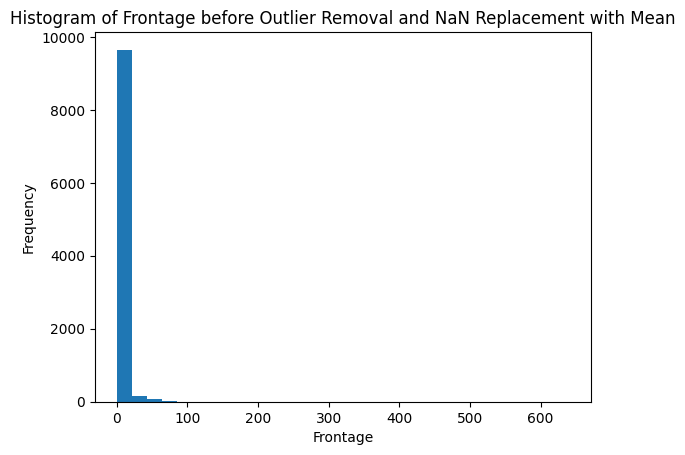

In [ ]:
plt.hist(data_df['Frontage'].dropna(), bins=30)
plt.xlabel('Frontage')
plt.ylabel('Frequency')
plt.title('Histogram of Frontage before Outlier Removal and NaN Replacement with Mean')
plt.show()

Lower Bound: 2.6, Upper Bound: 8.0
Mean value rounded to 1 decimal: 4.76


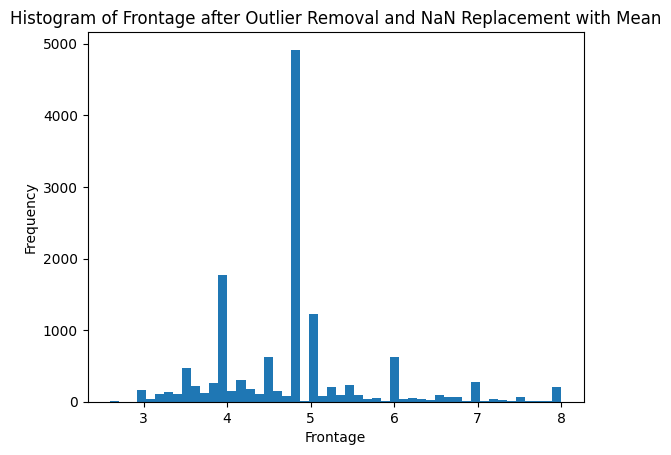

In [ ]:
Frontage_Q1 = data_df['Frontage'].quantile(0.25)
Frontage_Q3 = data_df['Frontage'].quantile(0.75)
IQR = Frontage_Q3 - Frontage_Q1

Frontage_lower_bound = Frontage_Q1 - 0.7 * IQR
Frontage_upper_bound = Frontage_Q3 + 1 * IQR
print(f"Lower Bound: {Frontage_lower_bound}, Upper Bound: {Frontage_upper_bound}")

data_df = data_df[(data_df['Frontage'].isna()) |
                  ((data_df['Frontage'] >= Frontage_lower_bound) & (data_df['Frontage'] <= Frontage_upper_bound))]

Frontage_mean = round(data_df['Frontage'].mean(), 2)
print(f"Mean value rounded to 1 decimal: {Frontage_mean}")

data_df.loc[:, 'Frontage'] = data_df['Frontage'].fillna(Frontage_mean)

plt.hist(data_df['Frontage'].dropna(), bins=50)
plt.xlabel('Frontage')
plt.ylabel('Frequency')
plt.title('Histogram of Frontage after Outlier Removal and NaN Replacement with Mean')
plt.show()

* **Area Xử lý dữ liệu ngoại lệ, dữ liệu bị thiếu**

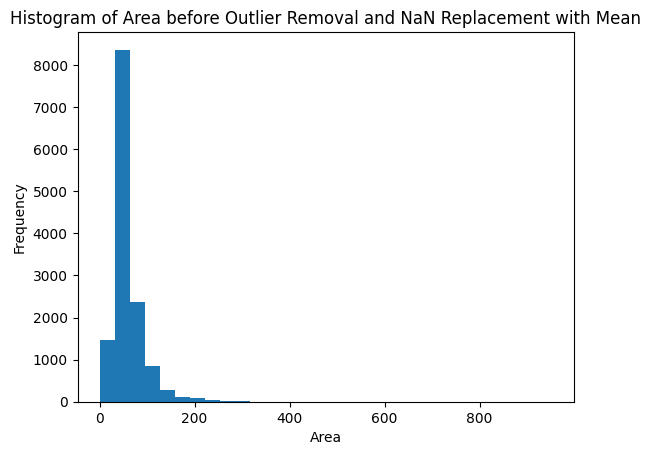

In [ ]:
plt.hist(data_df['Area'].dropna(), bins=30)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area before Outlier Removal and NaN Replacement with Mean')
plt.show()

Lower Bound: 9.0, Upper Bound: 96.0
Mean value rounded to 1 decimal: 50.1


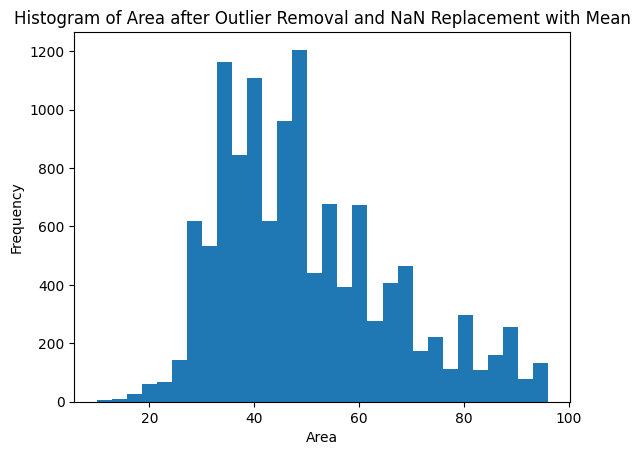

In [ ]:
Area_Q1 = data_df['Area'].quantile(0.25)
Area_Q3 = data_df['Area'].quantile(0.75)
IQR = Area_Q3 - Area_Q1

Area_lower_bound = Area_Q1 - 1 * IQR
Area_upper_bound = Area_Q3 + 1 * IQR
print(f"Lower Bound: {Area_lower_bound}, Upper Bound: {Area_upper_bound}")

data_df = data_df[(data_df['Area'].isna()) |
                  ((data_df['Area'] >= Area_lower_bound) & (data_df['Area'] <= Area_upper_bound))]

Area_mean = round(data_df['Area'].mean(), 1)
print(f"Mean value rounded to 1 decimal: {Area_mean}")

data_df.loc[:, 'Area'] = data_df['Area'].fillna(Area_mean)

plt.hist(data_df['Area'].dropna(), bins=30)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area after Outlier Removal and NaN Replacement with Mean')
plt.show()

* **NumberOfFloor xử lý outlier, dữ liệu khuyết**

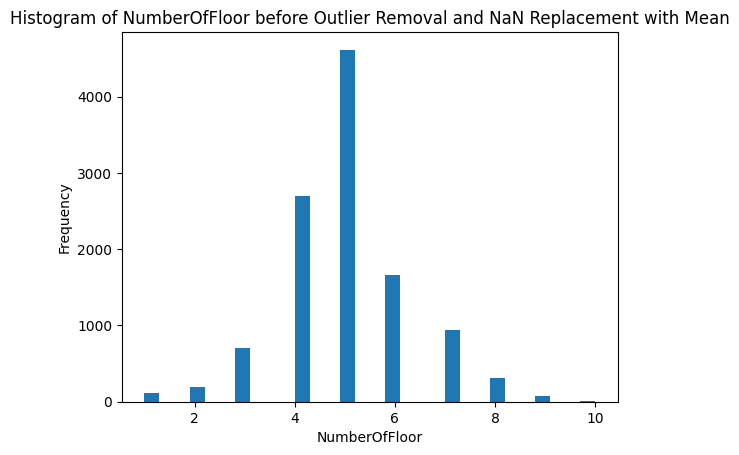

In [ ]:
plt.hist(data_df['NumberOfFloor'].dropna(), bins=30)
plt.xlabel('NumberOfFloor')
plt.ylabel('Frequency')
plt.title('Histogram of NumberOfFloor before Outlier Removal and NaN Replacement with Mean')
plt.show()

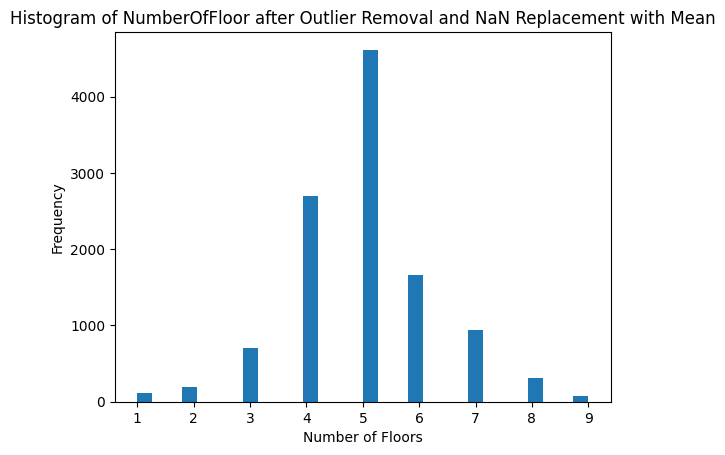

In [ ]:
floor_Q1 = data_df['NumberOfFloor'].quantile(0.25)
floor_Q3 = data_df['NumberOfFloor'].quantile(0.75)
floor_IQR = floor_Q3 - floor_Q1

floor_lower_bound = floor_Q1 - 1.5 * floor_IQR
floor_upper_bound = floor_Q3 + 1.5 * floor_IQR

data_df = data_df[(data_df['NumberOfFloor'] >= floor_lower_bound) & (data_df['NumberOfFloor'] <= floor_upper_bound)]

data_df.loc[data_df['NumberOfFloor'].isna(), 'NumberOfFloor'] = data_df['NumberOfFloor'].median()

plt.hist(data_df['NumberOfFloor'], bins=30)
plt.xlabel('Number of Floors')
plt.ylabel('Frequency')
plt.title('Histogram of NumberOfFloor after Outlier Removal and NaN Replacement with Mean')
plt.show()

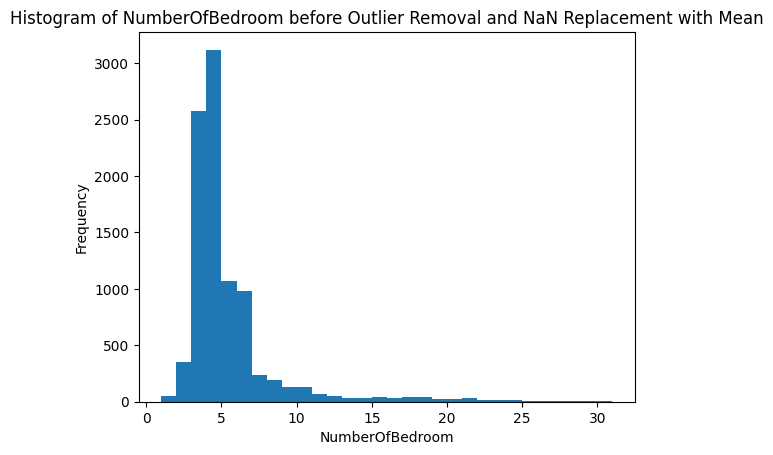

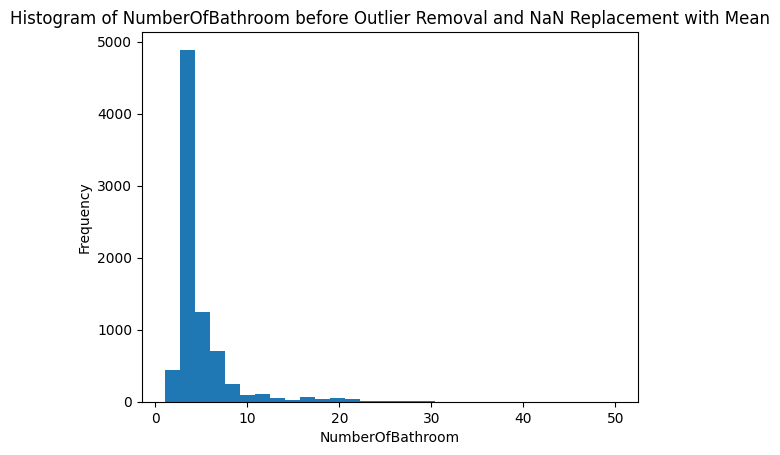

In [ ]:
plt.hist(data_df['NumberOfBedroom'].dropna(), bins=30)
plt.xlabel('NumberOfBedroom')
plt.ylabel('Frequency')
plt.title('Histogram of NumberOfBedroom before Outlier Removal and NaN Replacement with Mean')
plt.show()

plt.hist(data_df['NumberOfBathroom'].dropna(), bins=30)
plt.xlabel('NumberOfBathroom')
plt.ylabel('Frequency')
plt.title('Histogram of NumberOfBathroom before Outlier Removal and NaN Replacement with Mean')
plt.show()

       NumberOfBedroom  NumberOfBathroom
count      7347.000000       7347.000000
mean          4.095277          4.060977
std           1.286663          1.219604
min           1.000000          1.000000
25%           3.000000          3.000000
50%           4.000000          4.000000
75%           5.000000          5.000000
max           8.000000          8.000000


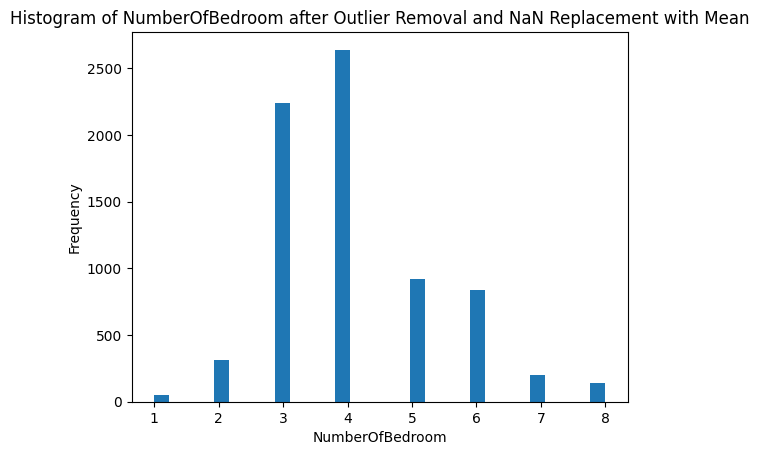

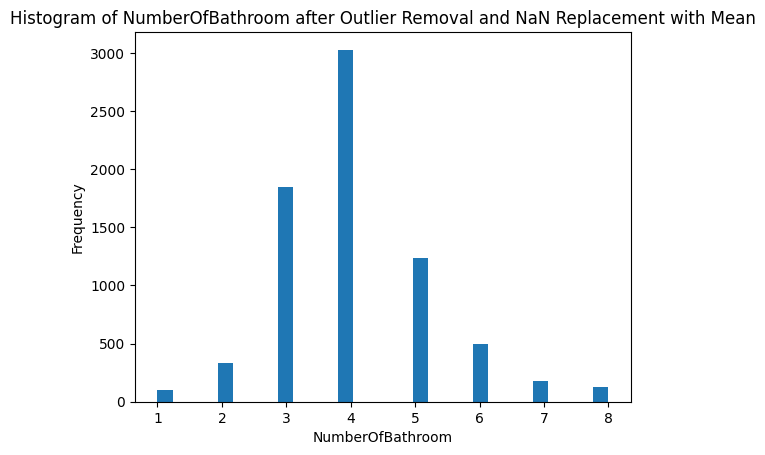

In [ ]:
Q1_bedroom = data_df['NumberOfBedroom'].quantile(0.25)
Q3_bedroom = data_df['NumberOfBedroom'].quantile(0.75)
IQR_bedroom = Q3_bedroom - Q1_bedroom
lower_bound_bedroom = Q1_bedroom - 1.5 * IQR_bedroom
upper_bound_bedroom = Q3_bedroom + 1.5 * IQR_bedroom

Q1_bathroom = data_df['NumberOfBathroom'].quantile(0.25)
Q3_bathroom = data_df['NumberOfBathroom'].quantile(0.75)
IQR_bathroom = Q3_bathroom - Q1_bathroom
lower_bound_bathroom = Q1_bathroom - 1.5 * IQR_bathroom
upper_bound_bathroom = Q3_bathroom + 1.5 * IQR_bathroom

data_df = data_df[(data_df['NumberOfBedroom'] >= lower_bound_bedroom) & (data_df['NumberOfBedroom'] <= upper_bound_bedroom)]

data_df = data_df[(data_df['NumberOfBathroom'] >= lower_bound_bathroom) & (data_df['NumberOfBathroom'] <= upper_bound_bathroom)]

data_df.loc[data_df['NumberOfBedroom'].isna(), 'NumberOfBedroom'] = data_df['NumberOfBathroom']
data_df.loc[data_df['NumberOfBathroom'].isna(), 'NumberOfBathroom'] = data_df['NumberOfBedroom']

median_bedroom = data_df['NumberOfBedroom'].median()
median_bathroom = data_df['NumberOfBathroom'].median()

data_df.loc[data_df['NumberOfBedroom'].isna(), 'NumberOfBedroom'] = median_bedroom
data_df.loc[data_df['NumberOfBathroom'].isna(), 'NumberOfBathroom'] = median_bathroom

print(data_df[['NumberOfBedroom', 'NumberOfBathroom']].describe())

plt.hist(data_df['NumberOfBedroom'].dropna(), bins=30)
plt.xlabel('NumberOfBedroom')
plt.ylabel('Frequency')
plt.title('Histogram of NumberOfBedroom after Outlier Removal and NaN Replacement with Mean')
plt.show()

plt.hist(data_df['NumberOfBathroom'].dropna(), bins=30)
plt.xlabel('NumberOfBathroom')
plt.ylabel('Frequency')
plt.title('Histogram of NumberOfBathroom after Outlier Removal and NaN Replacement with Mean')
plt.show()

* **Price xử lý ngoại lệ**

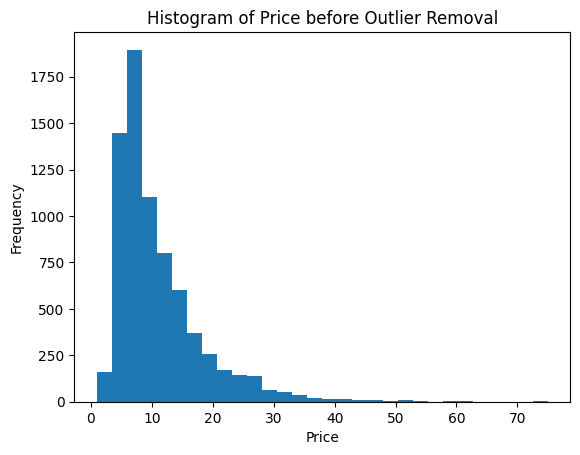

In [ ]:
plt.hist(data_df['Price'].dropna(), bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price before Outlier Removal')
plt.show()

Lower Bound: 2.575, Upper Bound: 17.275


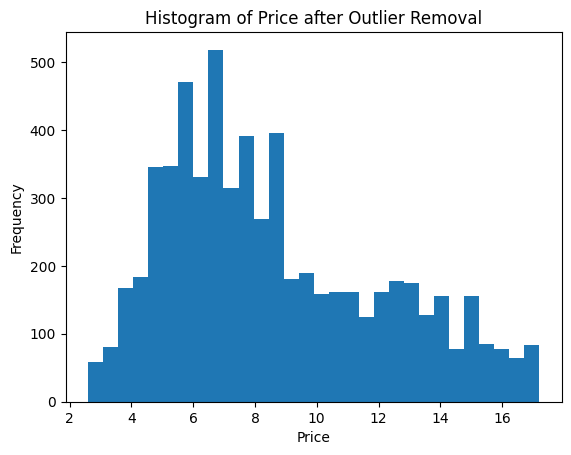

In [ ]:
Price_Q1 = data_df['Price'].quantile(0.25)
Price_Q3 = data_df['Price'].quantile(0.75)
Price_IQR = Price_Q3 - Price_Q1

Price_lower_bound = Price_Q1 - 0.5 * Price_IQR
Price_upper_bound = Price_Q3 + 0.5 * Price_IQR
print(f"Lower Bound: {Price_lower_bound}, Upper Bound: {Price_upper_bound}")

data_df = data_df[(data_df['Price'] >= Price_lower_bound) & (data_df['Price'] <= Price_upper_bound)]

plt.hist(data_df['Price'].dropna(), bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price after Outlier Removal')
plt.show()

In [ ]:
sum = 0.0
count = 1
for i in data_df['Price']:
  sum += i
  count += 1
print(sum/count)

8.628486268174498


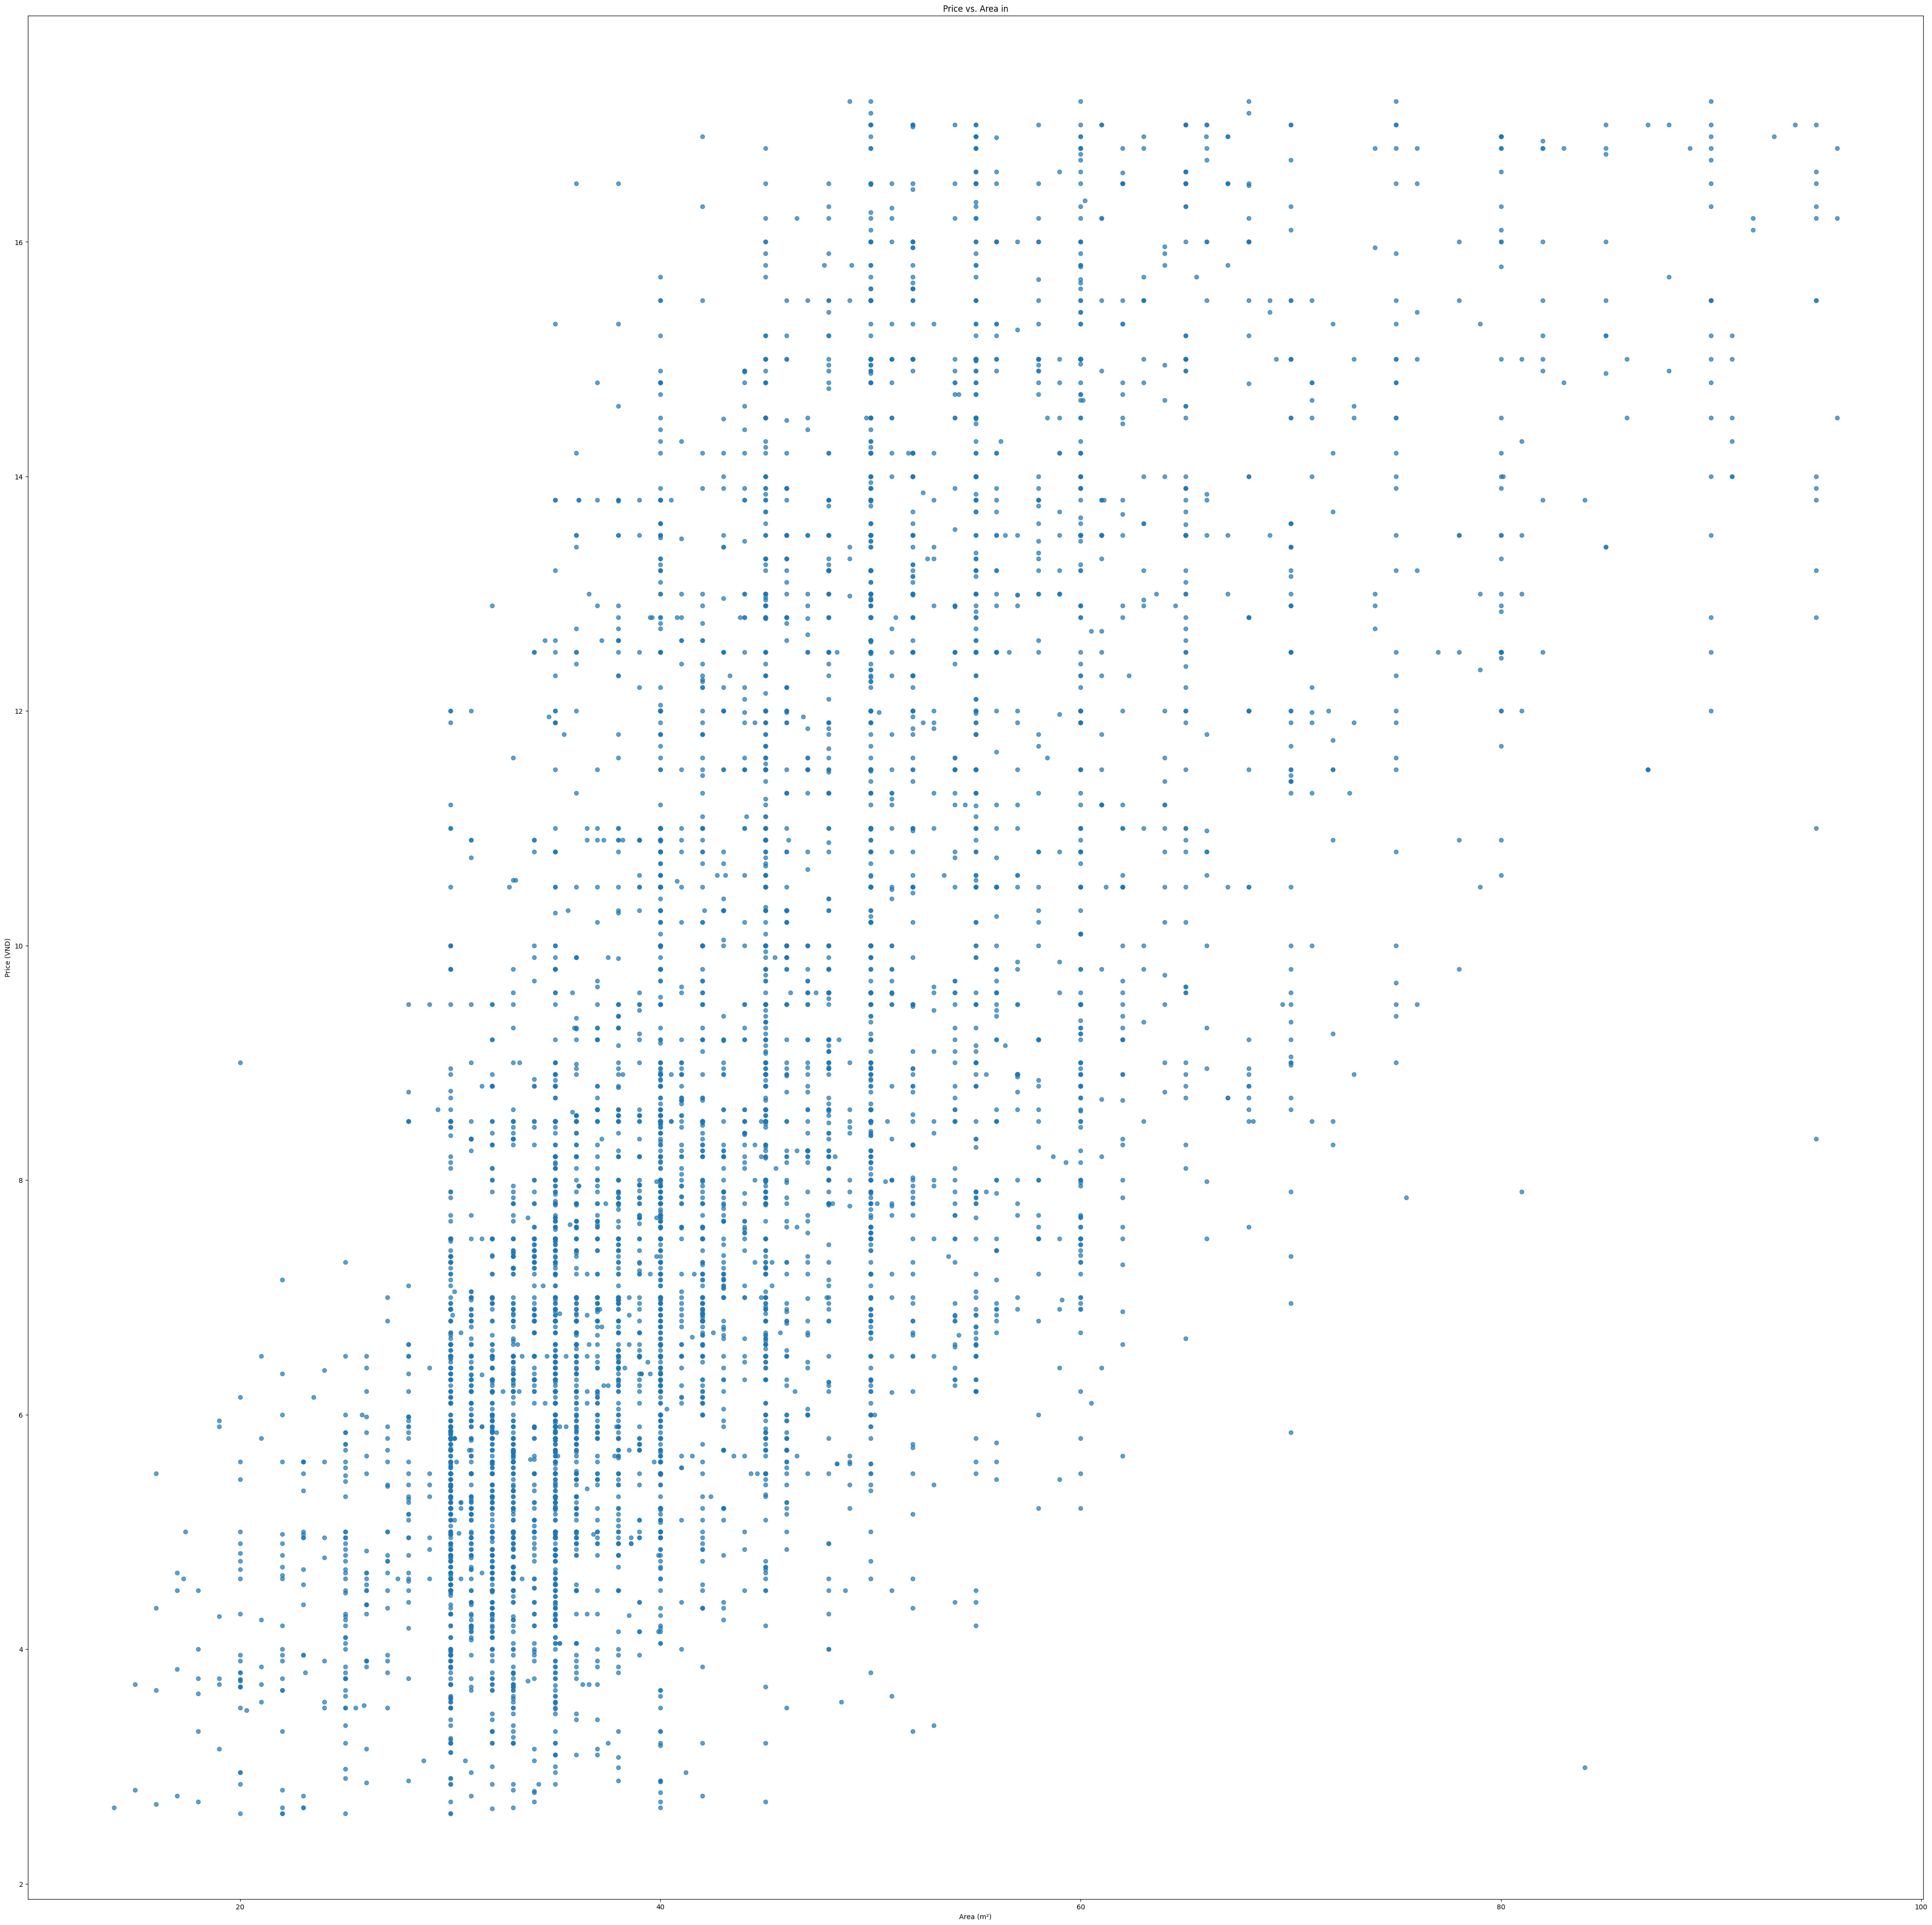

In [ ]:
plt.figure(figsize=(50, 50))
plt.scatter(data_df['Area'], data_df['Price'], alpha=0.7)

plt.title(f'Price vs. Area in')
plt.xlabel('Area (m²)')
plt.ylabel('Price (VND)')
plt.show()

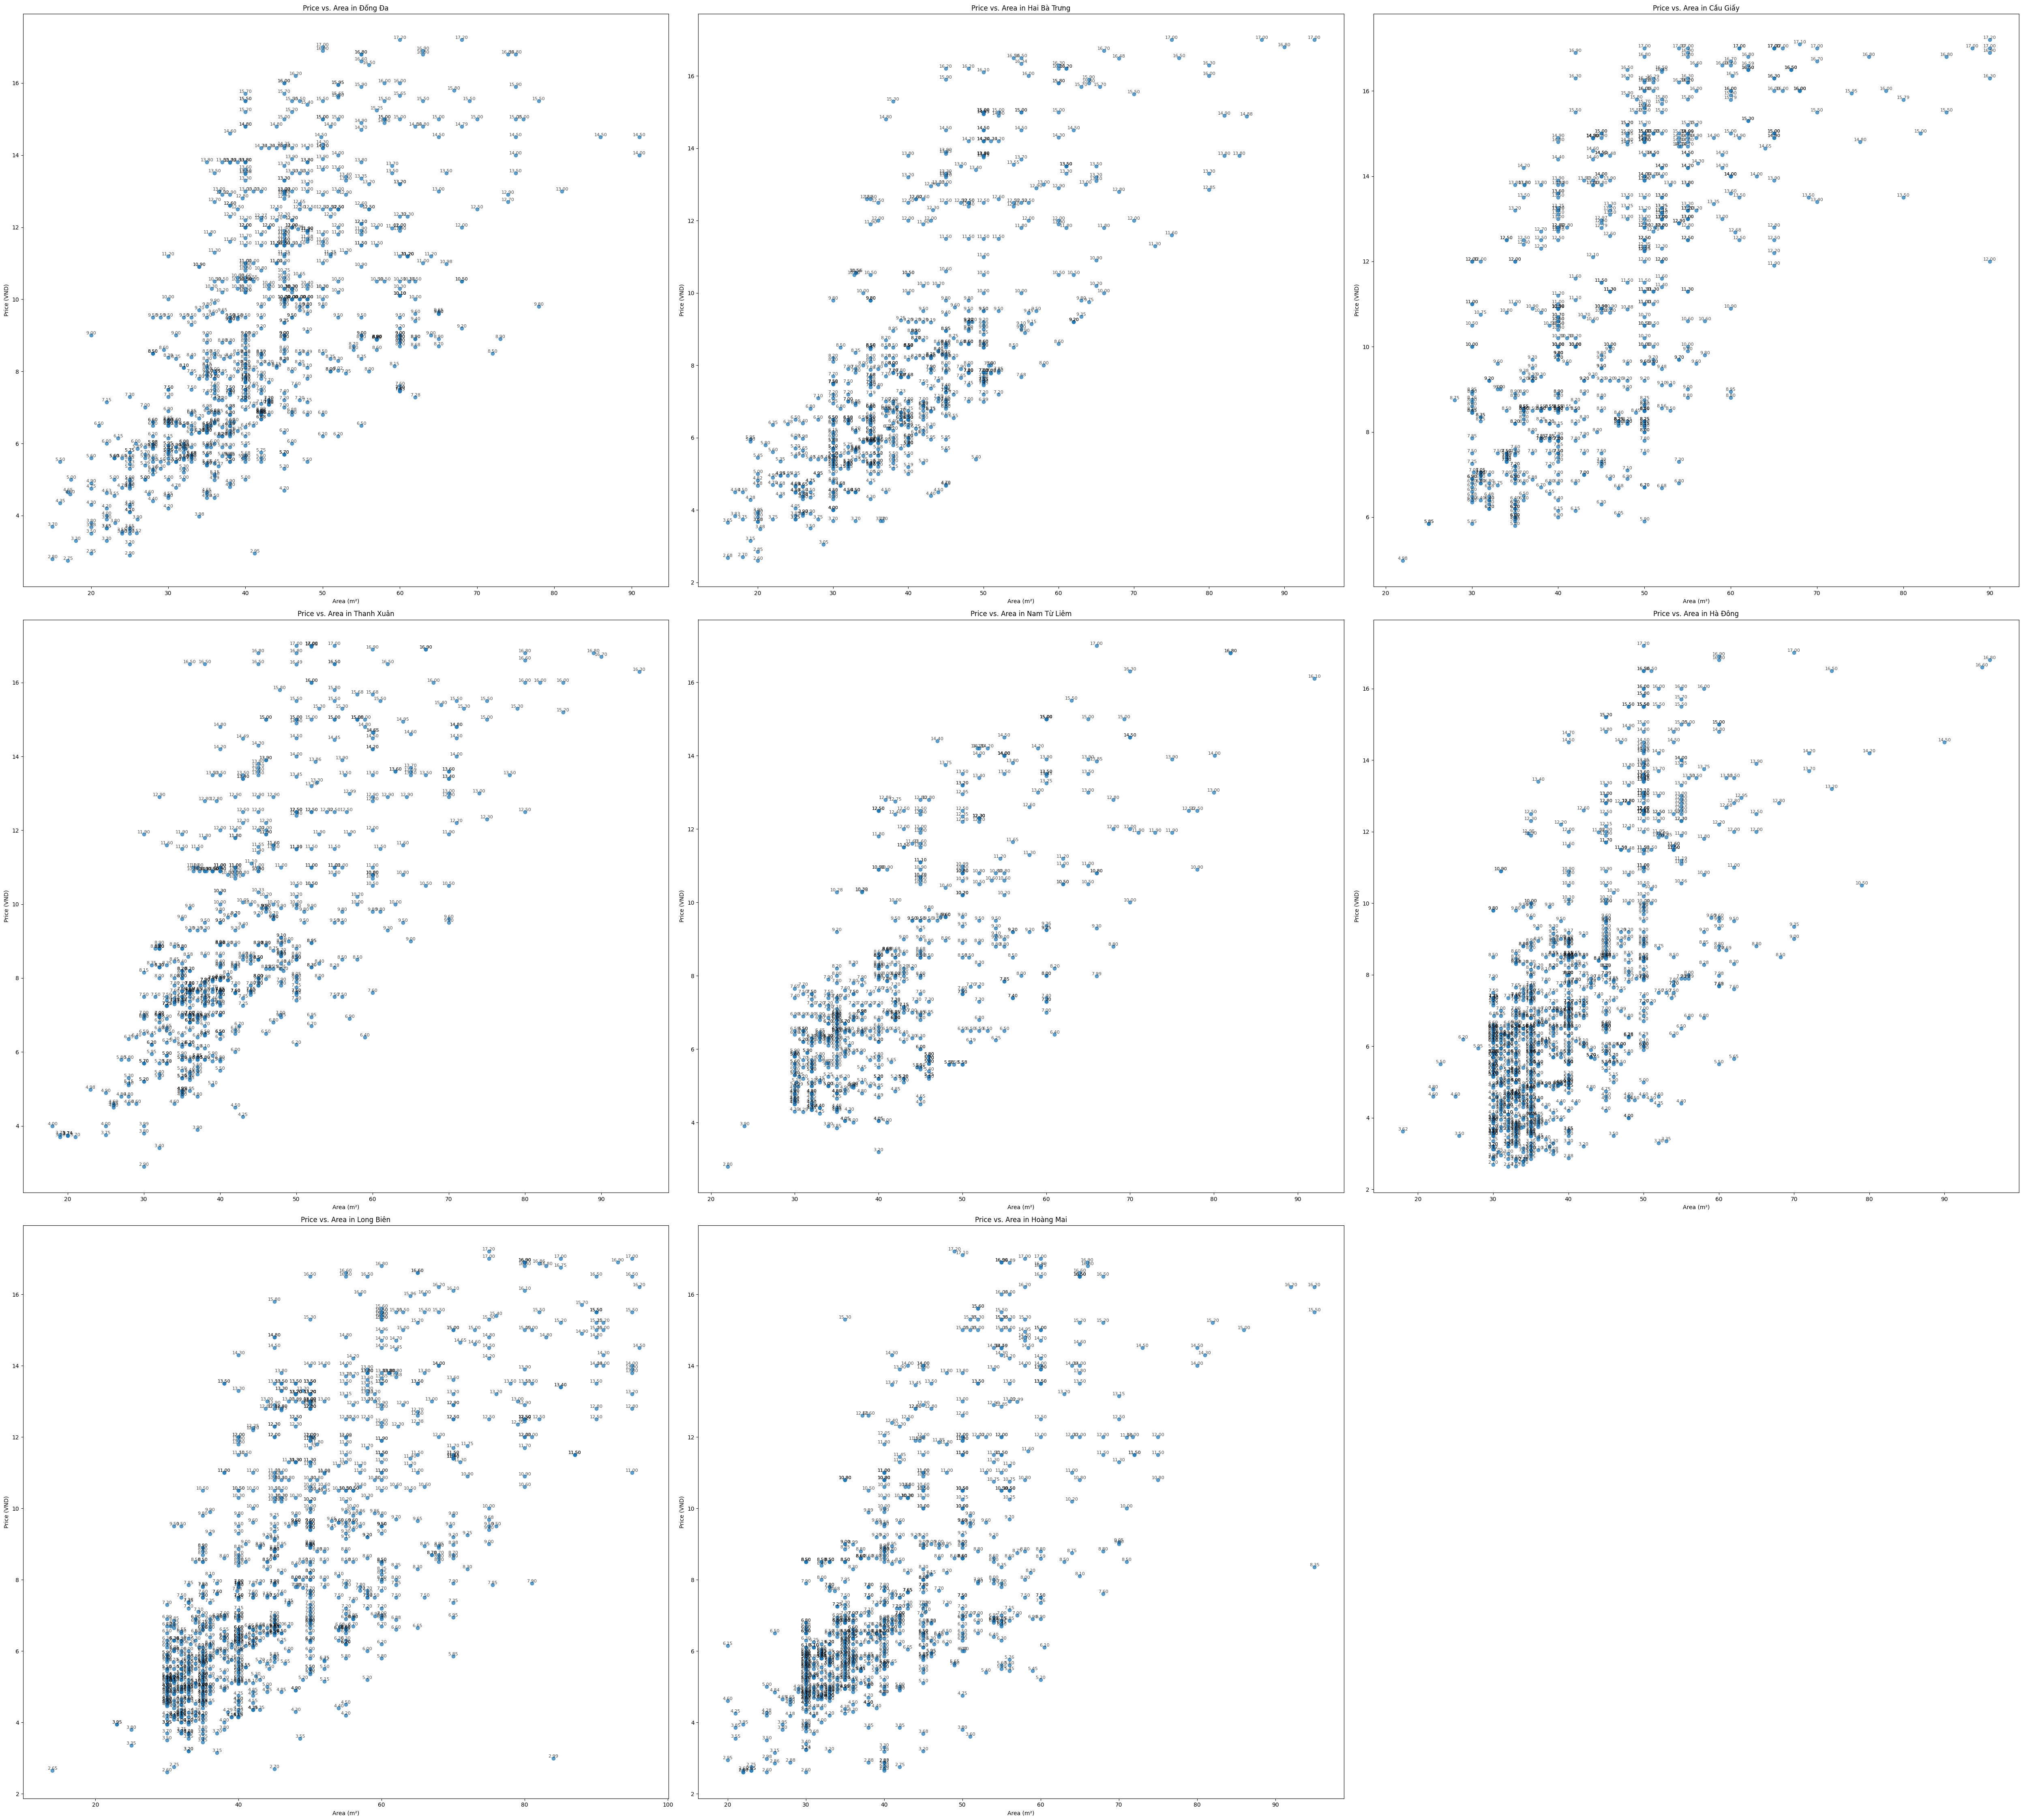

In [ ]:
# Lấy danh sách các quận/huyện duy nhất
districts = data_df['District'].unique()

# Thiết lập số lượng hàng và cột cho các biểu đồ phụ
num_districts = len(districts)
num_cols = 3  # Số lượng cột biểu đồ trong grid
num_rows = (num_districts + num_cols - 1) // num_cols  # Tính toán số hàng dựa trên số lượng quận/huyện

# Tạo figure với kích thước phù hợp
plt.figure(figsize=(50, 15 * num_rows))

# Duyệt qua từng quận/huyện và tạo một biểu đồ scatter riêng
for idx, district in enumerate(districts):
    # Lọc dữ liệu cho từng quận/huyện
    district_data = data_df[data_df['District'] == district]

    # Tạo một subplot cho quận/huyện hiện tại
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.scatter(district_data['Area'], district_data['Price'], alpha=0.7)

    # Hiển thị giá trên từng điểm dữ liệu
    for i in range(len(district_data)):
        area = district_data['Area'].iloc[i]
        price = district_data['Price'].iloc[i]
        plt.text(area, price, f'{price:.2f}', fontsize=8, ha='center', va='bottom', alpha=0.7)

    # Thiết lập tiêu đề và nhãn cho từng biểu đồ
    plt.title(f'Price vs. Area in {district_mapping.get(district, "Unknown District")}')
    plt.xlabel('Area (m²)')
    plt.ylabel('Price (VND)')
    plt.tight_layout()  # Điều chỉnh layout cho phù hợp

# Hiển thị tất cả các biểu đồ
plt.show()

nomalization

In [ ]:
columns_to_standardize = ['Frontage', 'Area', 'NumberOfFloor', 'NumberOfBedroom', 'NumberOfBathroom']

scaler = StandardScaler()
scaler_target = StandardScaler()

data_df[columns_to_standardize] = scaler.fit_transform(data_df[columns_to_standardize])
data_df['Price'] = scaler_target.fit_transform(data_df[['Price']])

print(data_df[columns_to_standardize].head(), "\n\n", data_df['Price'].head())

    Frontage      Area  NumberOfFloor  NumberOfBedroom  NumberOfBathroom
0  -0.847866  0.587904      -2.681422        -2.491224         -2.699887
2  -0.847866  0.346694       0.315566         1.741053          0.079025
3   2.974553  0.748710       2.313557         0.894598          1.931634
8   0.681102  0.909517      -1.682426        -0.798313         -1.773583
10 -1.612350  0.668307      -0.683430         0.048142         -0.847279 

 0    -0.181228
2    -0.008597
3     0.768243
8     2.350694
10    2.106133
Name: Price, dtype: float64


In [ ]:
data_df.shape

(6189, 11)

In [ ]:
missing_values_count = data_df.isnull().sum()

print(missing_values_count)

District             0
Ward                 0
Street               0
Frontage             0
NumberOfFloor        0
NumberOfBedroom      0
NumberOfBathroom     0
LegalDocumentType    0
Furnishing           0
Area                 0
Price                0
dtype: int64


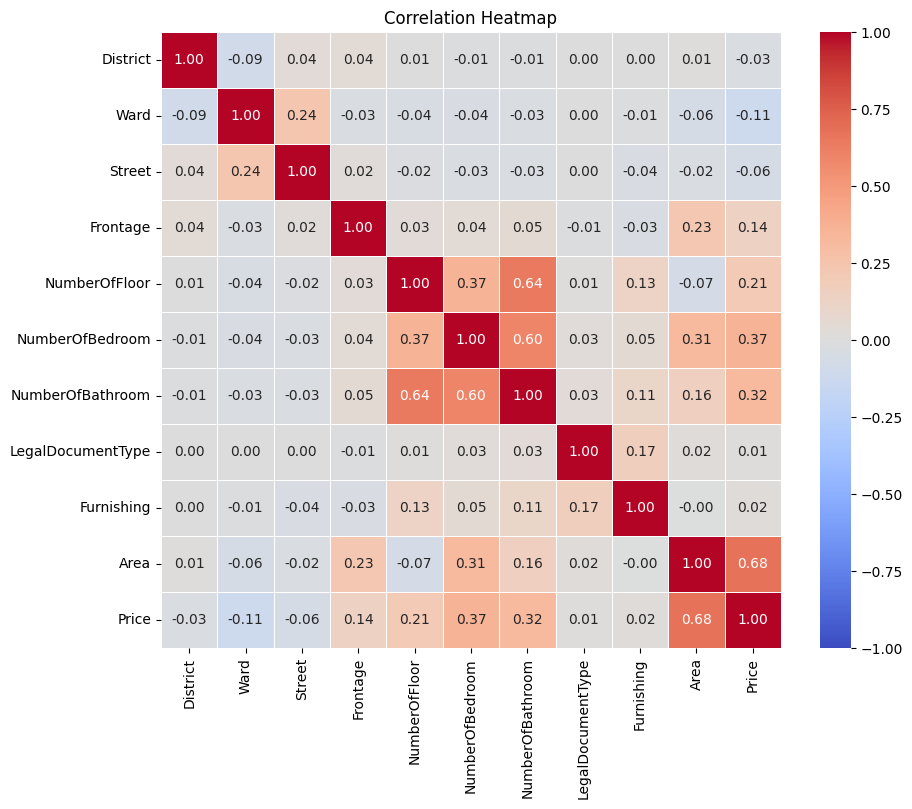

In [ ]:
corr_matrix = data_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

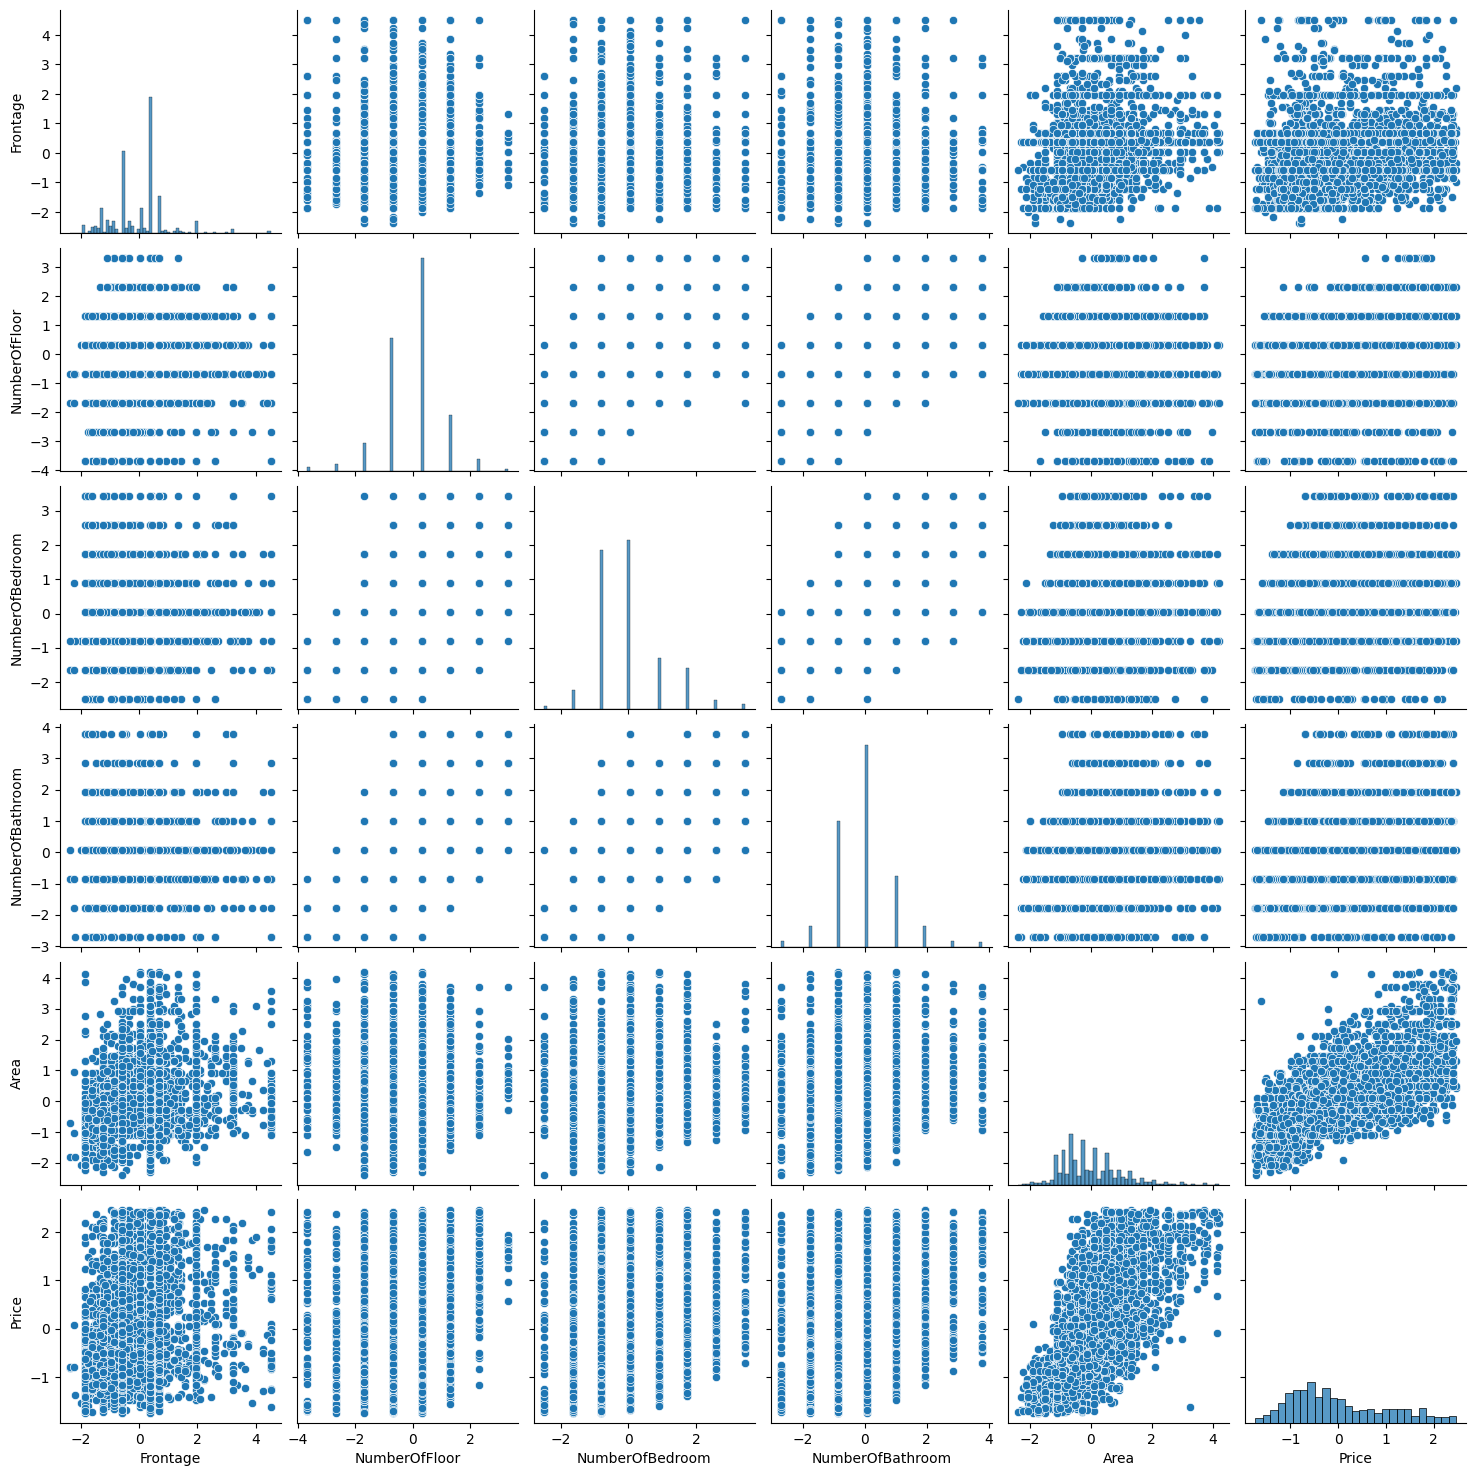

In [ ]:
numeric_columns = data_df.select_dtypes(include=['float64', 'int64', 'int']).columns
sns.pairplot(data_df[numeric_columns])

# **Linear Regression**

**Chia dữ liệu train, test**

In [ ]:
features = ['Frontage', 'Area', 'NumberOfFloor', 'NumberOfBedroom', 'NumberOfBathroom']

# Chọn biến đầu vào (X) và biến mục tiêu (y)
X = data_df[features]
y = data_df['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Hệ số (weights): [-0.0215165   0.67363815  0.20972297  0.06071398  0.03555464]
Hệ số chặn (bias): 0.0028447597587119306
Mean Absolute Error (MAE): 1.8136058112983446
R^2 Score: 0.522946414003564


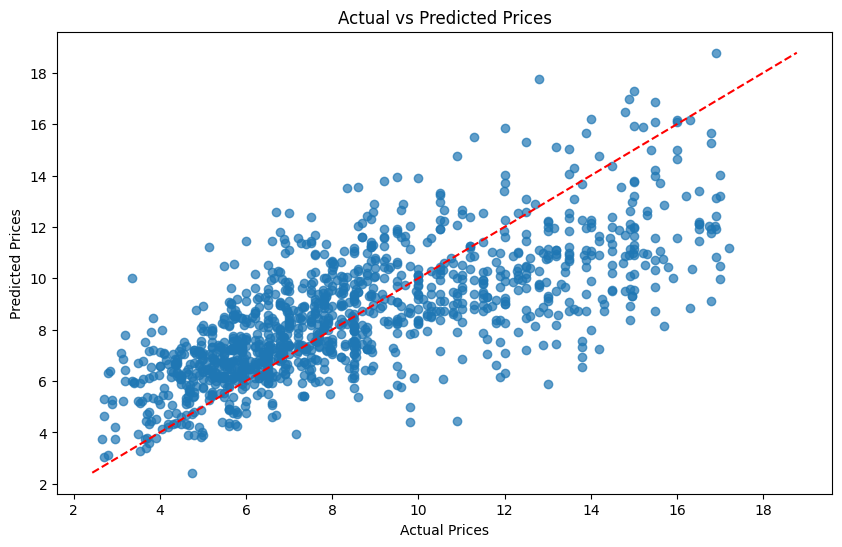

['scaler_y.pkl']

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Khởi tạo mô hình Linear Regression
linear_model = LinearRegression()

# Huấn luyện mô hình
linear_model.fit(X_train, y_train)

# Dự đoán giá dựa trên tập dữ liệu kiểm tra
y_pred_linear = linear_model.predict(X_test)

# Tính toán độ chính xác của mô hình
mae = mean_absolute_error(
    scaler_target.inverse_transform(y_test.to_numpy().reshape(-1, 1)).flatten(),
    scaler_target.inverse_transform(y_pred_linear.reshape(-1, 1)).flatten()
)
r2 = r2_score(y_test, y_pred_linear)

print("Hệ số (weights):", linear_model.coef_)
print("Hệ số chặn (bias):", linear_model.intercept_)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(
    scaler_target.inverse_transform(y_test.to_numpy().reshape(-1, 1)).flatten(),
    scaler_target.inverse_transform(y_pred_linear.reshape(-1, 1)).flatten(),
    alpha=0.7
)

# Vẽ đường chuẩn
max_value = max(
    scaler_target.inverse_transform(y_test.to_numpy().reshape(-1, 1)).flatten().max(),
    scaler_target.inverse_transform(y_pred_linear.reshape(-1, 1)).flatten().max()
)
min_value = min(
    scaler_target.inverse_transform(y_test.to_numpy().reshape(-1, 1)).flatten().min(),
    scaler_target.inverse_transform(y_pred_linear.reshape(-1, 1)).flatten().min()
)

# Vẽ đường thẳng 45 độ (đường chuẩn)
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

joblib.dump(linear_model, 'trained_linear_model.pkl')
joblib.dump(scaler, 'scaler_X.pkl')
joblib.dump(scaler_target, 'scaler_y.pkl')

In [ ]:
# Chuyển đổi các giá trị từ chuẩn hóa về giá trị ban đầu
actual_prices = scaler_target.inverse_transform(y_test.to_numpy().reshape(-1, 1)).flatten()
predicted_prices = scaler_target.inverse_transform(y_pred_linear.reshape(-1, 1)).flatten()

# Tạo DataFrame để lưu dữ liệu
df = pd.DataFrame({
    'Actual Price': actual_prices,
    'Predicted Price': predicted_prices
})

# Lưu DataFrame vào file Excel
df.to_excel('actual_vs_predicted_prices.xlsx', index=False)

print("File actual_vs_predicted_prices.xlsx đã được lưu thành công!")

File actual_vs_predicted_prices.xlsx đã được lưu thành công!


# **Linear Regression with Gradient Descent**

X shape: (6189, 5)
y shape: (6189, 1)
Iteration 0, Cost: 0.49973199330450974
Iteration 100, Cost: 0.2672119439711703
Iteration 200, Cost: 0.24525680298180136
Iteration 300, Cost: 0.23996494954235228
Iteration 400, Cost: 0.23812418712197772
Iteration 500, Cost: 0.23739278574680156
Iteration 600, Cost: 0.23708463708574107
Iteration 700, Cost: 0.2369496462093742
Iteration 800, Cost: 0.23688838437688506
Iteration 900, Cost: 0.23685958407285612
Weights: [[ 0.00281548]
 [-0.02057524]
 [ 0.67100848]
 [ 0.20313635]
 [ 0.06002972]
 [ 0.04236053]]
Mean Absolute Error (MAE): 1.8140804085777469
R^2 Score: 0.5229164718002586


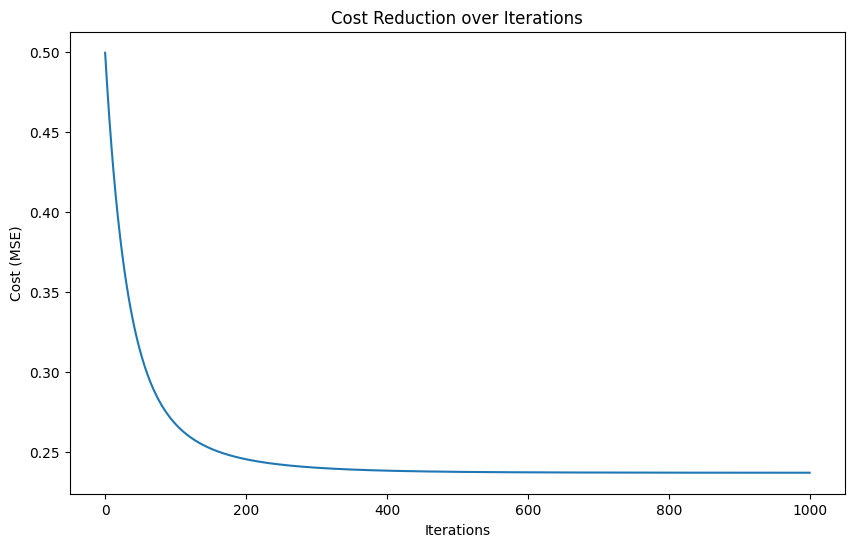

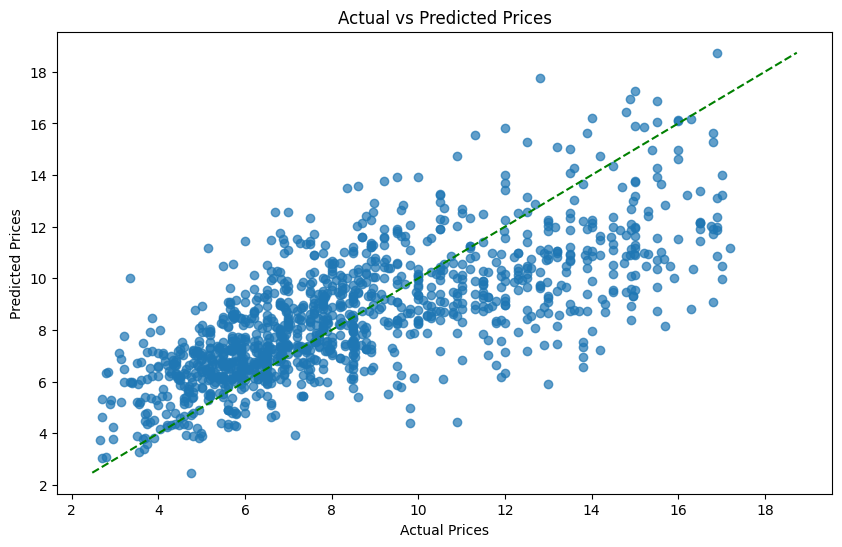

In [ ]:
def compute_cost(X, y, weights):
    n_samples = len(y)
    predictions = X.dot(weights)
    cost = (1 / (2 * n_samples)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, weights, learning_rate, n_iterations):
    n_samples = len(y)
    cost_history = []

    for i in range(n_iterations):
        predictions = X.dot(weights)

        gradients = (1 / n_samples) * X.T.dot(predictions - y)

        weights -= learning_rate * gradients

        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f'Iteration {i}, Cost: {cost}')

    return weights, cost_history

X = data_df[features].values
y = data_df['Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Thêm một cột bias (cột các giá trị 1) vào X_train
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Khởi tạo các trọng số ban đầu
initial_weights = np.zeros((X_train_bias.shape[1], 1))

# Thiết lập tham số huấn luyện
learning_rate = 0.01
n_iterations = 1000

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# Huấn luyện mô hình
weights, cost_history = gradient_descent(X_train_bias, y_train, initial_weights, learning_rate, n_iterations)

# Dự đoán giá trị với tập kiểm tra
y_pred_train = X_train_bias.dot(weights)
y_pred_test = X_test_bias.dot(weights)

# Chuyển đổi lại giá trị dự đoán từ dạng chuẩn hóa về giá trị ban đầu
y_pred_test_original = scaler_target.inverse_transform(y_pred_test)
y_test_original = scaler_target.inverse_transform(y_test)

# Tính toán độ chính xác của mô hình
mae = np.mean(np.abs(y_pred_test_original - y_test_original))
r2 = 1 - (np.sum((y_test_original - y_pred_test_original) ** 2) / np.sum((y_test_original - np.mean(y_test_original)) ** 2))

print(f'Weights: {weights}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction over Iterations')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_test_original, alpha=0.7)

max_value = max(
    scaler_target.inverse_transform(y_test.reshape(-1, 1)).flatten().max(),
    scaler_target.inverse_transform(y_pred_test.reshape(-1, 1)).flatten().max()
)
min_value = min(
    scaler_target.inverse_transform(y_test.reshape(-1, 1)).flatten().min(),
    scaler_target.inverse_transform(y_pred_test.reshape(-1, 1)).flatten().min()
)

plt.plot([min_value, max_value], [min_value, max_value], color='green', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# **Thử nghiệm mô hình với giá trị ngoài**

In [ ]:
def predict_custom_input():
    Frontage = 3.8
    Area = 51
    NumberOfFloor = 2
    NumberOfBedroom = 1
    NumberOfBathroom = 1

    custom_data = np.array([[Frontage, Area, NumberOfFloor, NumberOfBedroom, NumberOfBathroom]])

    custom_data_scaled = scaler.transform(custom_data)
    custom_data_bias = np.c_[np.ones((custom_data_scaled.shape[0], 1)), custom_data_scaled]

    linear_predicted_price = linear_model.predict(custom_data_scaled)
    model_predicted_price = custom_data_bias.dot(weights)

    print(f"Sklearn Linear Regression Prediction: {scaler_target.inverse_transform(linear_predicted_price.reshape(-1, 1)).flatten()[0]}")
    print(f"Linear Regression Prediction: {scaler_target.inverse_transform(model_predicted_price.reshape(-1, 1)).flatten()[0]}")

predict_custom_input()

Sklearn Linear Regression Prediction: 7.265772466958017
Linear Regression Prediction: 7.26096793311846


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
